# Pymaceuticals Inc.
---

### Analysis

- There is strong positive correlation between the mouse weight and the average tumor volume for the Capomulin regimen. 
- The gender distribution is almost even.
- Capomulin and Ramicane reduced the tumor size better compare to Infubinol and Ceftamin.
- Capomulin and Ramicane had the most number of mice tested.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = merged_df["Mouse ID"].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.loc[merged_df["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_df = merged_df.groupby("Drug Regimen")
tumor_mean = drug_regimen_df["Tumor Volume (mm3)"].mean()
tumor_median = drug_regimen_df["Tumor Volume (mm3)"].median()
tumor_var = drug_regimen_df["Tumor Volume (mm3)"].var()
tumor_stdev = drug_regimen_df["Tumor Volume (mm3)"].std()
tumor_SEM = drug_regimen_df["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Vollume": tumor_mean,
                      "Median Tumor Volume": tumor_median,
                      "Tumor Volume Variance": tumor_var ,
                      "Tumor Volume Std. Dev.": tumor_stdev,
                      "Tumor Volume Std. Err.": tumor_SEM})
summary_df


,Mean Tumor Vollume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

aggregations = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
merged_df.groupby("Drug Regimen").agg(aggregations)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

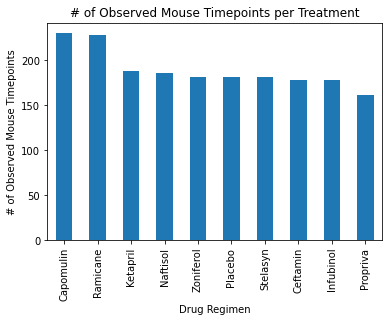

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_timepoints = drug_regimen_df["Drug Regimen"].count()
total_timepoints_df = pd.DataFrame(total_timepoints)
total_timepoints_df.columns = ["Total Data Points"]
total_timepoints_plot = total_timepoints_df.sort_values("Total Data Points", ascending = False).plot(kind="bar", legend=False)
total_timepoints_plot.set_xlabel("Drug Regimen")
total_timepoints_plot.set_ylabel("# of Observed Mouse Timepoints")
plt.title("# of Observed Mouse Timepoints per Treatment")
plt.show()

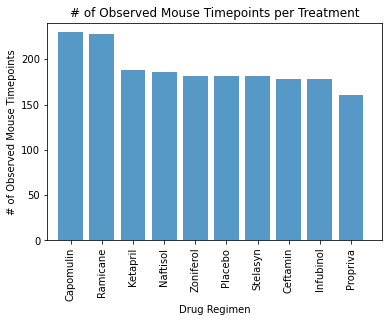

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(total_timepoints_df))
tick_locations = [value for value in x_axis]

total_timepoints_df = total_timepoints_df.sort_values("Total Data Points", ascending = False)
plt.bar(x_axis, total_timepoints_df["Total Data Points"], alpha = 0.75, align="center")
plt.xticks(tick_locations, total_timepoints_df.index, rotation="vertical")

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, 240)

plt.title("# of Observed Mouse Timepoints per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

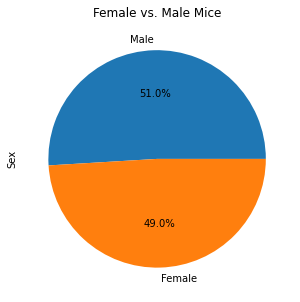

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot(kind = "pie", autopct = "%1.1f%%",  figsize = (5,5))
plt.show()


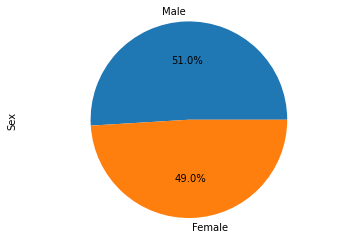

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
counts = [gender_data["Male"],gender_data["Female"]]
plt.pie(counts, labels = labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
select_treatments = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | 
                                    (clean_df["Drug Regimen"] == "Ramicane") |
                                    (clean_df["Drug Regimen"] == "Infubinol") |
                                    (clean_df["Drug Regimen"] == "Ceftamin"),
                                    ["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)" ]]
select_treatments
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = select_treatments.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()
max_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df= max_timepoint.merge(clean_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]], 
                                                 on = ["Mouse ID", "Timepoint"], how = "left")
tumor_volume_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Locate the rows which contain mice on each drug and get the tumor volumes
mouse = merged_df.groupby(["Mouse ID"]).max()
mouse_reset_index = mouse.reset_index()

combined_data = mouse_reset_index[['Mouse ID','Timepoint']].\
    merge(merged_df,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(drug):
    drug_data = combined_data.loc[combined_data["Drug Regimen"] == drug]['Tumor Volume (mm3)']
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    quartiles = drug_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = drug_data.loc[(drug_data < lower_bound) | (drug_data > upper_bound)]
    print(f"{drug}'s potential outliers:{outliers}")
    return drug_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


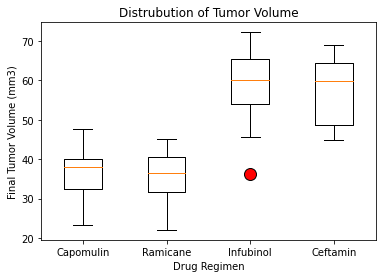

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data = [cap, ram, inf, ceft]
fig1, ax1 = plt.subplots()
fig = ax1.boxplot(tumor_vol_data, labels=treatment_drugs, \
                  flierprops = dict(marker = "o", markersize = 12, markerfacecolor = "red"))
ax1.set_title('Distrubution of Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

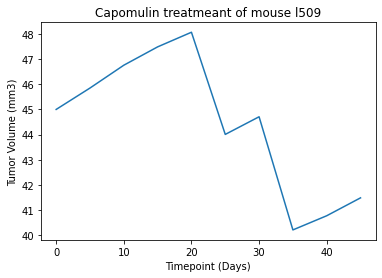

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = list(clean_df.loc[clean_df["Mouse ID"]=='l509'])
capomulin_spec_mouse_df = clean_df.loc[(clean_df["Drug Regimen"] == 'Capomulin') & (clean_df["Mouse ID"] == 'l509'), :]
                            
capomulin_spec_mouse_df= capomulin_spec_mouse_df[["Mouse ID","Tumor Volume (mm3)", 'Timepoint' ]].reset_index(drop= True)
plt.plot(capomulin_spec_mouse_df["Timepoint"], capomulin_spec_mouse_df["Tumor Volume (mm3)"])
plt.title("Capomulin treatmeant of mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

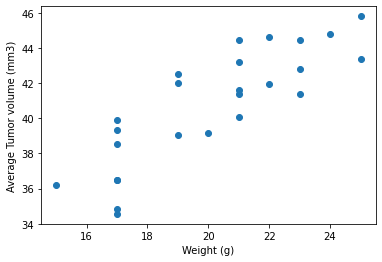

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == 'Capomulin') , :]
mouse_weight = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(mouse_weight['Weight (g)'],mouse_weight['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


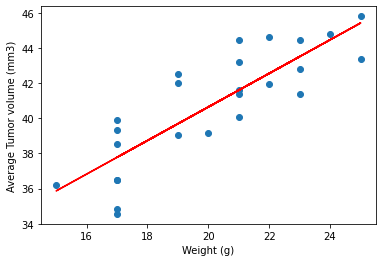

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight['Weight (g)'],mouse_weight['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= linregress(mouse_weight["Weight (g)"],mouse_weight["Tumor Volume (mm3)"])
regress_values=mouse_weight["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mouse_weight["Weight (g)"],mouse_weight["Tumor Volume (mm3)"])
plt.plot(mouse_weight["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor volume (mm3)")
plt.show()